## Домашнее задание 1

### Задача 1 - Сравнение предложений

In [0]:
import re
import numpy as np
import scipy
from scipy.spatial import distance

In [0]:
with open('sentences.txt', 'r') as f:
    text = list(map(str.lower, f.readlines()))

In [0]:
words = []
for sent in text:
    w = re.split('[^a-z]', sent)
    w = [s for s in w if len(s) > 0]
    words += w

In [0]:
d = {}
d.update(zip(np.unique(words), range(len(np.unique(words)))))
d

{'a': 0,
 'according': 1,
 'adjacent': 2,
 'allow': 3,
 'allows': 4,
 'also': 5,
 'an': 6,
 'ancestor': 7,
 'and': 8,
 'animals': 9,
 'any': 10,
 'app': 11,
 'apple': 12,
 'are': 13,
 'arguments': 14,
 'artificial': 15,
 'as': 16,
 'available': 17,
 'based': 18,
 'basic': 19,
 'be': 20,
 'between': 21,
 'binary': 22,
 'both': 23,
 'by': 24,
 'bytes': 25,
 'can': 26,
 'cat': 27,
 'catenates': 28,
 'cats': 29,
 'changes': 30,
 'chromosomes': 31,
 'clear': 32,
 'closest': 33,
 'command': 34,
 'commands': 35,
 'common': 36,
 'community': 37,
 'comparison': 38,
 'computers': 39,
 'concatenate': 40,
 'concern': 41,
 'connected': 42,
 'contains': 43,
 'content': 44,
 'count': 45,
 'create': 46,
 'default': 47,
 'delete': 48,
 'deliberately': 49,
 'developed': 50,
 'diploid': 51,
 'disk': 52,
 'displays': 53,
 'dogs': 54,
 'domestic': 55,
 'domesticated': 56,
 'domestication': 57,
 'download': 58,
 'drive': 59,
 'during': 60,
 'ears': 61,
 'editions': 62,
 'enhancements': 63,
 'entirely': 64,


In [0]:
matrix = np.zeros((len(text), len(d)))
matrix.shape

(22, 254)

In [0]:
for i in range(len(text)):
    word = re.split('[^a-z]', text[i])
    for w in d:
        matrix[i, d[w]] = word.count(w)

In [0]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [0]:
with open('submission-1.txt', 'w') as fout:
    minim = []
    for i in range(1, len(text)):
        dist = scipy.spatial.distance.cosine(matrix[0], matrix[i])
        minim.append((dist, int(i)))
        
    m = sorted(str(x[1]) for x in sorted(minim)[:2])
    
    fout.write(' '.join(m))

### Задача 2 - Аппроксимация функции

In [0]:
import matplotlib.pyplot as plt
from scipy.linalg import solve

In [0]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

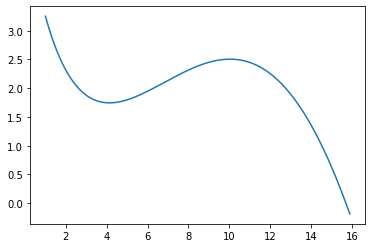

In [0]:
x = np.arange(1, 16, 0.1)
plt.plot(x, f(x))
plt.show()

In [0]:
A = np.array([[1, 1], [1, 15]])
print(A)
b = np.array([f(1), f(15)])
print(b)

[[ 1  1]
 [ 1 15]]
[3.25221687 0.63522142]


In [0]:
w = scipy.linalg.solve(A, b)

In [0]:
def F(w, x):
    return w @ np.array([1, x])

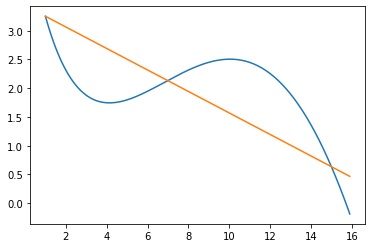

In [0]:
x = np.arange(1, 16, 0.1)
plt.plot(x, f(x))
plt.plot(x, [F(w, i) for i in x])
plt.show()

In [0]:
A = np.array([[1, 1, 1], [1, 8, 8**2],[1, 15, 15**2]])
print(A)
b = np.array([f(1), f(8), f(15)])
print(b)
w = scipy.linalg.solve(A, b)

[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
[3.25221687 2.31617016 0.63522142]


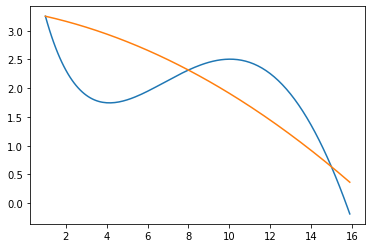

In [0]:
def F(w, x):
    return w @ np.array([1, x, x**2])

x = np.arange(1, 16, 0.1)
plt.plot(x, f(x))
plt.plot(x, [F(w, i) for i in x])
plt.show()

In [0]:
A = np.array([[1, 1, 1, 1], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3],[1, 15, 15**2, 15**3]])
print(A)
b = np.array([f(1), f(4), f(10), f(15)])
print(b)
w = scipy.linalg.solve(A, b)

[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
[3.25221687 1.74684595 2.50541641 0.63522142]


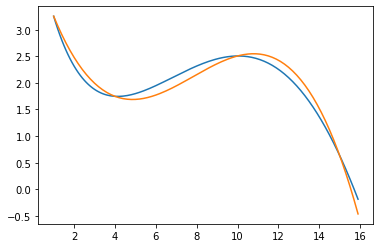

In [0]:
def F(w, x):
    return w @ np.array([1, x, x**2, x**3])

x = np.arange(1, 16, 0.1)
plt.plot(x, f(x))
plt.plot(x, [F(w, i) for i in x])
plt.show()

In [0]:
with open('submission-2.txt', 'w') as fout:
    fout.write(" ".join(list(map(str, map(lambda x:round(x, ndigits=2),w)))))

In [0]:
list(map(str, map(lambda x:round(x, ndigits=2),w)))

['4.36', '-1.3', '0.19', '-0.01']

## Домашнее задание 2

### Задача 1 - Минимизация гладкой функции

In [0]:
from scipy.optimize import minimize

In [0]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

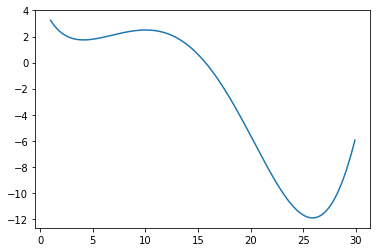

In [0]:
x = np.arange(1, 30, 0.1)
plt.plot(x, f(x))
plt.show()

In [0]:
min1 = scipy.optimize.minimize(f, x0=2, method='BFGS')
min2 = scipy.optimize.minimize(f, x0=30, method='BFGS')
print(min1)
print(min2)

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])
      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])


In [0]:
with open('submission-1.txt', 'w') as f:
  f.write(' '.join([str(round(min1.fun, 2)), str(round(min2.fun, 2))]))

### Задача 2 - Глобальная оптимизация

In [0]:
from scipy.optimize import differential_evolution

In [0]:
def f(x):
    return np.sin(x[0] / 5) * np.exp(x[0] / 10) + 5 * np.exp(-x[0] / 2)

In [0]:
evol = scipy.optimize.differential_evolution(f, bounds=[(1, 30)])
evol

     fun: -11.898894665974838
     jac: array([-2.84217094e-06])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([25.88018836])

In [0]:
with open('submission-2.txt', 'w') as fout:
    fout.write(str(round(evol.fun, 2)))

### Задача 3 - Минимизация негладкой функции

In [0]:
def f(x):
  return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

def h(x):
  return int(f(x))

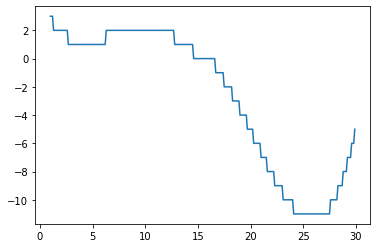

In [0]:
x = np.arange(1, 30, 0.1)
plt.plot(x, list(map(int, f(x))))
plt.show()

In [0]:
min1 = scipy.optimize.minimize(h, x0=30, method='BFGS')
min1

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [0]:
min2 = scipy.optimize.differential_evolution(h, bounds=[(1, 30)])
min2

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([24.94236066])

In [0]:
with open('submission-3.txt', 'w') as f:
  f.write(' '.join([str(round(min1.fun, 2)), str(round(min2.fun, 2))]))

## Домашнее задание 3

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline
plt.style.use('ggplot')

In [0]:
# Возьмем хи-квадрат распределение с параметром k=3
chi_rv = sts.chi2(3)
sample = chi_rv.rvs(1000)

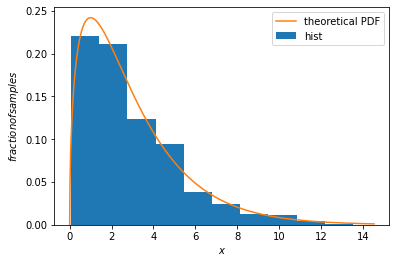

In [0]:
x = np.linspace(0,max(sample)+1,1000)
pdf = chi_rv.pdf(x)
# нарисуем гистограмму распределения выборки
plt.hist(sample, label='hist', density=True)
# нарисуем поверх функцию плотности распрделения
plt.plot(x, pdf, label='theoretical PDF')
plt.ylabel('$fraction of samples$')
plt.xlabel('$x$')
plt.legend()
plt.show()

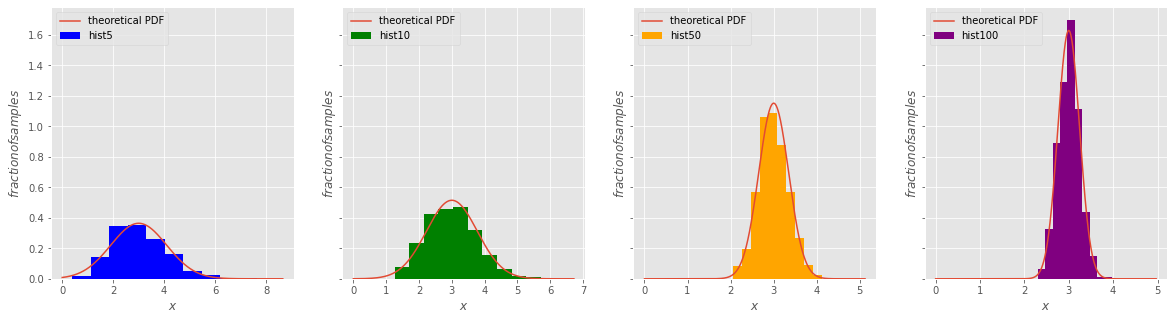

In [0]:
# создадим 4 подграфика
fig, axes = plt.subplots(1, 4, figsize=(20,5), sharey=True)
sizes = [5, 10, 50, 100] # размеры выборок
colors = ['blue', 'green', 'orange', 'purple'] # цвета
for i in range(len(sizes)):
  means = [] # создадим список, в который будем сохранять выборочные средние 
  for _ in range(1000):
    sample = chi_rv.rvs(sizes[i]) # генерируем выборку
    means.append(sum(sample)/sizes[i]) # считаем выборочное среднее
  # зададим нормальное распределение для выборки данного размера
  # согласно википедии: мат.ожидание = k, т.е. 3, а дисперсия 2*k, т.е. 6
  # также делим дисперсию на размер выборки и извлекаем из нее квадратный корень
  norm_rv = sts.norm(3, np.sqrt(2*3/sizes[i])) 
  x = np.linspace(0,max(means)+1,1000)
  pdf = norm_rv.pdf(x) # зададим теоретическую функцию плотности распределения
  # строим графики
  axes[i].plot(x, pdf, label='theoretical PDF') 
  axes[i].hist(means, label='hist'+str(sizes[i]), density=True, color=colors[i])
  axes[i].legend(loc='upper left')
  axes[i].set_ylabel('$fraction of samples$')
  axes[i].set_xlabel('$x$')
plt.show()

### Результаты
В начале при увеличении n аппроксимация становится лучше, а приближение точнее. Это видно из графиков 1, 2 и 3.
Затем с ростом n график начинает вытягиваться вверх, и при этом изменения в точности приближения становятся менее заметными (графики 3 и 4).
